In [11]:
from torchvision import transforms
from dataloader import FlameDataset

smallest_resolution = 2160
work_resolution = 512

image_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.CenterCrop(smallest_resolution),
        transforms.Resize((work_resolution, work_resolution), antialias=True),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]
)

mask_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.CenterCrop(smallest_resolution),
        transforms.Resize((work_resolution, work_resolution), interpolation=transforms.InterpolationMode.NEAREST, antialias=True)
    ]
)

dataset_dir = "dataset"
dataset = FlameDataset(dataset_dir, image_transform, mask_transform)

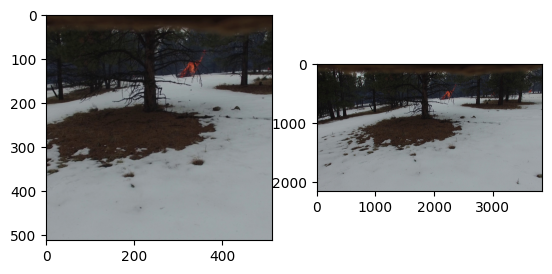

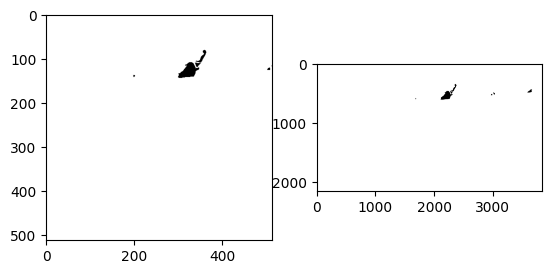

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
from utils import load_image, load_mask, torch_image_to_numpy

idx_image_to_plot = 100
image, mask = dataset[idx_image_to_plot]

plt.subplot(1, 2, 1)
plt.imshow(torch_image_to_numpy(image))
plt.subplot(1, 2, 2)
original_image_path = os.path.join(dataset_dir, "Images", f"image_{idx_image_to_plot}.jpg")
original_image = load_image(original_image_path)
plt.imshow(original_image)
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='Greys')
plt.subplot(1, 2, 2)
original_mask_path = os.path.join(dataset_dir, "Masks", f"image_{idx_image_to_plot}.png")
original_mask = load_mask(original_mask_path)
plt.imshow(original_mask, cmap='Greys')
plt.show()

Counting white pixels: 100%|██████████| 500/500 [01:38<00:00,  5.08it/s]


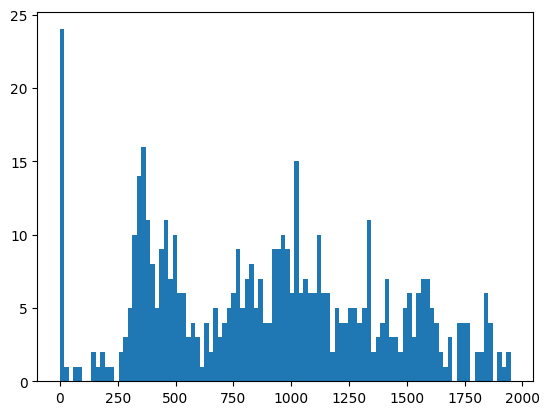

In [13]:
import tqdm
import torch

dataset_white_pixels = []
for i in tqdm.trange(len(dataset) // 4, desc="Counting white pixels"):
    num_white_pixels = torch.sum(dataset[i][1] == 1)
    dataset_white_pixels.append(num_white_pixels.item())

plt.hist(dataset_white_pixels, bins=100)
plt.show()